#New York Stock Exchange
##S&P 500 companies historical prices with fundamental data

- ***Source*** - **https://www.kaggle.com/dgawlik/nyse**

###Context :

- **This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.**

###Content
**Dataset consists of following files:**

- prices.csv: raw, as-is daily prices. Most of data spans from 2010 to the end 2016, for companies new on stock market date range is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that.

- prices-split-adjusted.csv: same as prices, but there have been added adjustments for splits.

- securities.csv: general description of each company with division on sectors

- fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators.
Acknowledgements
Prices were fetched from Yahoo Finance, fundamentals are from Nasdaq Financials, extended by some fields from EDGAR SEC databases.**

###Inspiration

- **Here is couple of things one could try out with this data:**

  - One day ahead prediction: Rolling Linear Regression, ARIMA, Neural Networks, LSTM
  - Momentum/Mean-Reversion Strategies
  - Security clustering, portfolio construction/hedging
  
**Which company has biggest chance of being bankrupt? Which one is undervalued (how prices behaved afterwards), what is Return on Investment?**

In [0]:
#Loading required Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read Data

In [2]:
df = pd.read_csv('prices-split-adjusted.csv', header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
#Total number of Companies

df['symbol'].value_counts().index

Index(['TGNA', 'ORLY', 'AWK', 'JBHT', 'NKE', 'JEC', 'WU', 'PCLN', 'NBL', 'FMC',
       ...
       'CFG', 'SYF', 'QRVO', 'WRK', 'KHC', 'PYPL', 'HPE', 'CSRA', 'WLTW',
       'FTV'],
      dtype='object', length=501)

- **There are total 501 Companies listed in our Data.**
- **Further, we need to choose one of the company for Analysis / Prediction. E.g: "GOOG" (Google / Alphabet)**

In [4]:
#Lets choose one of the company

google = df[df['symbol'] == 'GOOG']
google.tail()

,date,symbol,open,close,low,high,volume
848963,2016-12-23,GOOG,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,GOOG,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,GOOG,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,GOOG,783.330017,782.789978,778.919983,785.929993,742200.0
850963,2016-12-30,GOOG,782.750000,771.820007,770.409973,782.780029,1760200.0


In [0]:
#Average Closing

avg_closing = google['close'].mean()

Text(0, 459.61740876856567, 'Average')

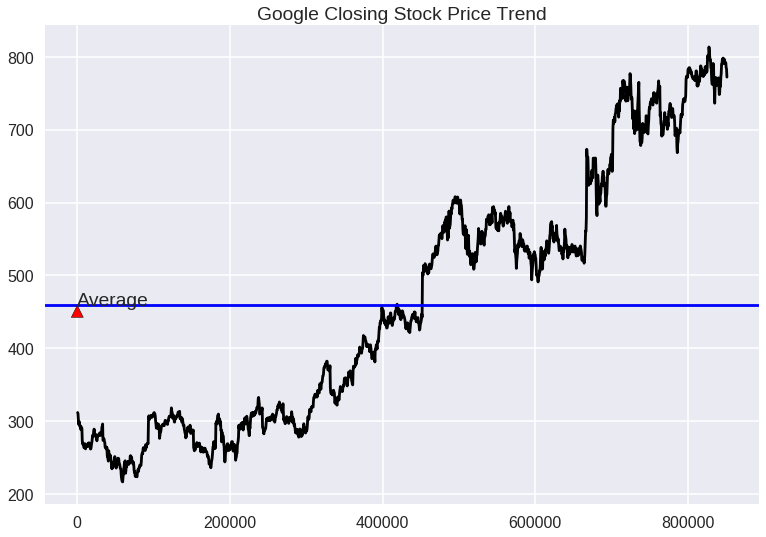

In [6]:
sns.set_context('poster')
plt.plot(google.close, 'black')
plt.title('Google Closing Stock Price Trend')
plt.axhline(avg_closing, color='b')
plt.annotate('Average',xy=(0,avg_closing), arrowprops=dict(facecolor='r', shrink=0.1))

In [0]:
google['date'] = pd.to_datetime(google['date'])
google.set_index(['date'], inplace=True)

#Computing 10-Days SMA / Simple Moving Average (Rolling Mean) 

- **The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.**

- **Why Use a Moving Average ?**
  - **A moving average helps cut down the amount of "noise" on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. If it is angled up, the price is moving up (or was recently) overall; angled down, and the price is moving down overall; moving sideways, and the price is likely in a range.**

  - **Initial SMA: 10-period sum / 10** 

In [9]:
mov_avg_close = pd.rolling_mean(google['close'], 10)
mov_avg_vol = pd.rolling_mean(google['volume'], 10)
mov_avg = pd.concat([mov_avg_close, mov_avg_vol], axis=1)
mov_avg.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


,close,volume
date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,NaN
2010-01-06,NaN,NaN
2010-01-07,NaN,NaN
2010-01-08,NaN,NaN
2010-01-11,NaN,NaN
2010-01-12,NaN,NaN
2010-01-13,NaN,NaN
2010-01-14,NaN,NaN


Text(0.5, 1.0, '10-Day SMA - Price and Volume (Right)')

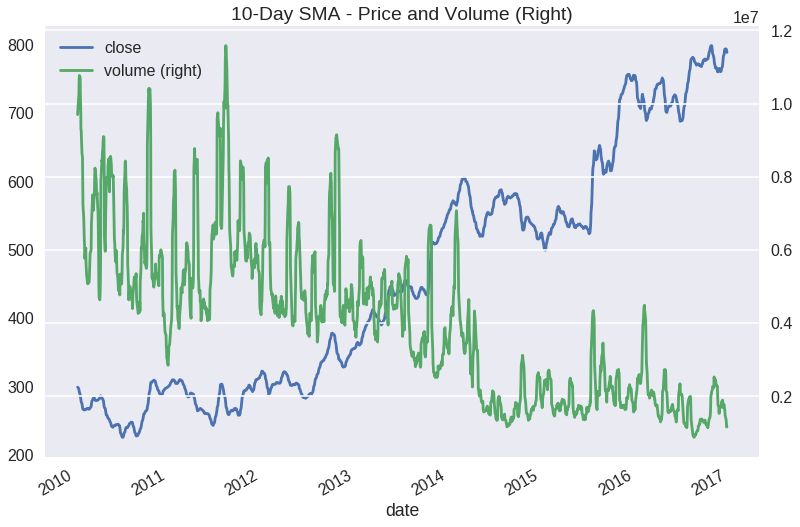

In [10]:
mov_avg.plot(secondary_y=['volume'])
plt.title('10-Day SMA - Price and Volume (Right)')

- **It's evident from the above Rolling Average Visualization that as Stock Price is rising over the period of Time, Volume is decreasing.**

- **We can say that Google's Stock Price is Inveresely Proportional its Stock Volume.**

### How volume and price moves reveal the market's trend ?

- **It is important to look at the relationship between volume and price.  A price move, up or down, that is on higher volume is more significant.  Therefore, an analysis of price and volume allows the investor to better interpret the trends in price and any changes thereto.  In other words, volume gives an indication of the strength (momentum) of a move in price.**

- **Current trading volume and average trading volume should be compared.  Average trading volume typically decreases when a stock is in a downtrend, because investors view negatively a stock declining in price.  An increasing price is typically coupled with increased volume, but the price can decrease without an increase in volume if investors lose interest in the issue.  On the other hand, a declining stock price may be coupled with higher volume when, for example, negative news comes out about the company.**

  - ![alt text](https://anandabhisheksingh.me/wp-content/uploads/2018/07/volume_price_relation.jpg)

#Data Preparation

In [0]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler, Normalizer

#Forecasting for next 30 days
days = 30

#Normalizing the Data
normalizer = StandardScaler()

#Dataframe shifts index by desired number of periods
target = google['close'].shift(-days)

X = google[['close']]

X = normalizer.fit_transform(X)

X = X[:-days]

X_pred = X[-days:]

target.dropna(inplace=True)

Y = target.values

In [12]:
X.shape, Y.shape

((1732, 1), (1732,))

#Implementing Estimator - Linear Regression

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=128, test_size=0.3)

est = LinearRegression(fit_intercept=True)
est.fit(xtrain, ytrain)

print ('Training Score : ' ,est.score(xtrain, ytrain), '\n')

print ('Cross Validation Score : ', cross_val_score(est, xtrain, ytrain, cv=5).mean())

Training Score :  0.9569035916940549 

Cross Validation Score :  0.9565794509299165


- **"estimator.score"** - Returns the coefficient of determination **R^2** of the prediction.

- **"cross_val_score"** - Evaluates the estimator's performance to get a impression if our Model is overfitting or underfitting

- Our Estimator performance is **0.9570** and Cross Validation Score is **0.9569** which tells us that our model is a good-fit. 

#Null RMSE

- **Null RMSE** is the **RMSE** that could be achieved by always predicting the mean response value. It is a **benchmark** against which you may want to measure your regression model.

In [15]:
#null rmse
null_rmse = np.zeros_like(ytest, dtype='float')
null_rmse.fill(ytest.mean())
print ('Null RMSE : ',np.sqrt(mean_squared_error(null_rmse, ytest)))

Null RMSE :  177.347156529549


#Forecasting

- Set that will contain the forecasted data

In [16]:
forecast = est.predict(X_pred)
forecast

array([783.75900536, 781.98737674, 792.79648131, 789.93993261,
       792.99555722, 785.08279106, 785.42122499, 786.84451829,
       802.07282386, 808.2835787 , 803.77477347, 806.16355305,
       819.83916942, 814.42465453, 805.86497053, 802.16236836,
       802.18229357, 791.4030166 , 790.47738074, 775.63726289,
       769.09803723, 768.98856752, 789.39252237, 797.34507823,
       792.16942896, 769.52601565, 761.02604856, 743.1700968 ,
       765.47507617, 771.43700229])

#Evaluation Metrics - RMSE

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors

  - 

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [17]:
print ('RMSE : ',np.sqrt(mean_squared_error(est.predict(xtest), ytest)))

RMSE :  36.25205612939327


#  Adding the predicted values to dateframe by creating Time Series

In [18]:
last_date = target.index[-1]
last_date

Timestamp('2016-11-16 00:00:00')

In [19]:
trange = pd.date_range(last_date, periods=days+1, freq='D')[1:]
trange

DatetimeIndex(['2016-11-17', '2016-11-18', '2016-11-19', '2016-11-20',
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30', '2016-12-01', '2016-12-02',
               '2016-12-03', '2016-12-04', '2016-12-05', '2016-12-06',
               '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-10',
               '2016-12-11', '2016-12-12', '2016-12-13', '2016-12-14',
               '2016-12-15', '2016-12-16'],
              dtype='datetime64[ns]', freq='D')

In [20]:
#30 days of Forecasted values
forecasted_df = pd.DataFrame(forecast, index=trange, columns=['Forecast'])
forecasted_df

,Forecast
2016-11-17,783.759005
2016-11-18,781.987377
2016-11-19,792.796481
2016-11-20,789.939933
2016-11-21,792.995557
2016-11-22,785.082791
2016-11-23,785.421225
2016-11-24,786.844518
2016-11-25,802.072824
2016-11-26,808.283579


Text(0.5, 1.0, 'Forecasted Values')

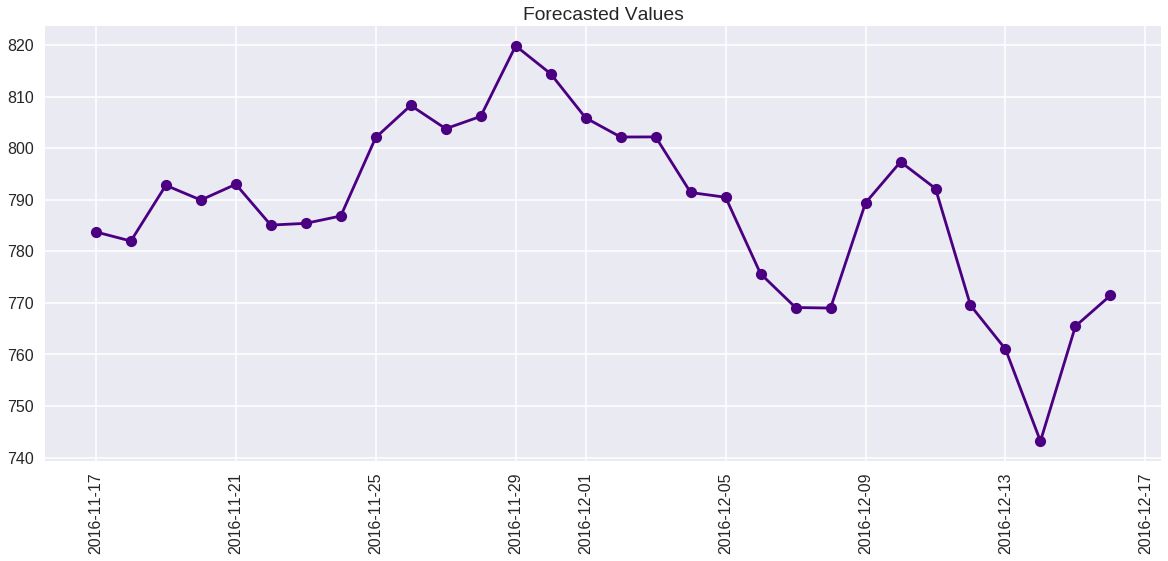

In [23]:
plt.figure(figsize=(20,8))
plt.plot(forecasted_df.index, forecasted_df['Forecast'], 'indigo', marker='o')
plt.xticks(rotation='vertical')
plt.title('Forecasted Values')

#What's Next ?

- **Hyper-Parameter Tuning can boost the Scores.**

- **One can also approach with Ensemble / Bagging techniques.**